In [1]:
# 包导入部分
import pyodbc as pssql
import pandas as pd
# import sklearn as sk
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

conn = pssql.connect(u'DRIVER={SQL Server};SERVER=YAN\SQLEXPRESS;DATABASE=TPC-H')
cursor = conn.cursor()
plt.rcParams['figure.dpi'] = 75
sns.set_theme(style='darkgrid')

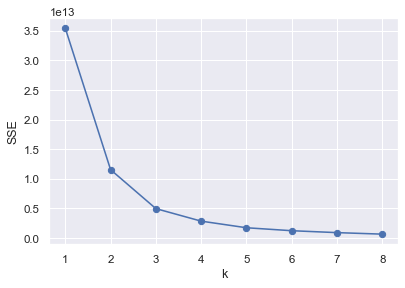

In [9]:
from sklearn.cluster import KMeans

RFM_main = pd.read_sql('SELECT * FROM RFM where RECENCY IS NOT NULL', conn)

# k-means part1: 确定 k-means 聚类的 K 值
SSE = [] # 存放每次结果的误差平方和
for k in range(1,9): 
    estimator = KMeans(n_clusters=k) # 构造聚类器 
    estimator.fit(RFM_main[['RECENCY', 'FREQUECY', 'MONETARY']]) 
    SSE.append(estimator.inertia_)

X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

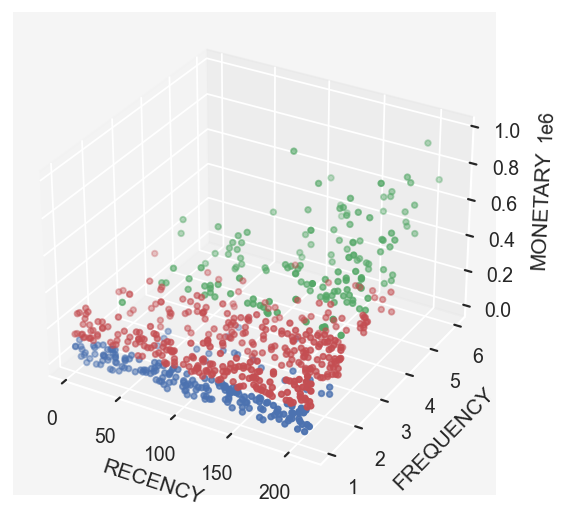

In [27]:
import matplotlib._color_data as mcd
_colors = ['r', 'b', 'g']

# K-means 聚类主体
k_num = 3
k_means_model = KMeans(k_num)
k_means_model.fit(RFM_main[['RECENCY', 'FREQUECY', 'MONETARY']])

__label = k_means_model.labels_.tolist()

# 聚类结果可视化
fig = plt.figure(figsize=(5, 5), dpi=128)
ax = fig.gca(fc='whitesmoke', projection='3d')
ax.set_xlabel('RECENCY')
ax.set_ylabel('FREQUENCY')
ax.set_zlabel('MONETARY')
# ax.view_init(elev=0, azim=60)

total = [[[], [], []] for i in range(k_num)]

for index, row in RFM_main.iterrows():
    this_class = __label[index]
    if(row['RECENCY'] < 0):
        continue

    total[this_class][0].append(row['RECENCY'])
    total[this_class][1].append(row['FREQUECY'])
    total[this_class][2].append(int(row['MONETARY']))

for i in range(k_num):
    ax.scatter(np.array(total[i][0]), np.array(total[i][1]), np.array(total[i][2]), s=10, color=_colors[i])

plt.show()

# 聚类结果保存
RFM_main['C_TYPE'] = __label
RFM_main.to_csv('Data/RFM_TEMP.csv', encoding='utf-8', index=False)